In [12]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [14]:
IMG_SIZE = 224
IMG_CHANNEL = 3
BATCH_SIZE = 32
COLOR_MODE = 'rgb'

In [15]:
train_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Shenzhen_TB/train/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)

dev_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Shenzhen_TB/train/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

test_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Shenzhen_TB/test/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 532 files belonging to 2 classes.
Using 426 files for training.
Found 532 files belonging to 2 classes.
Using 106 files for validation.
Found 130 files belonging to 2 classes.


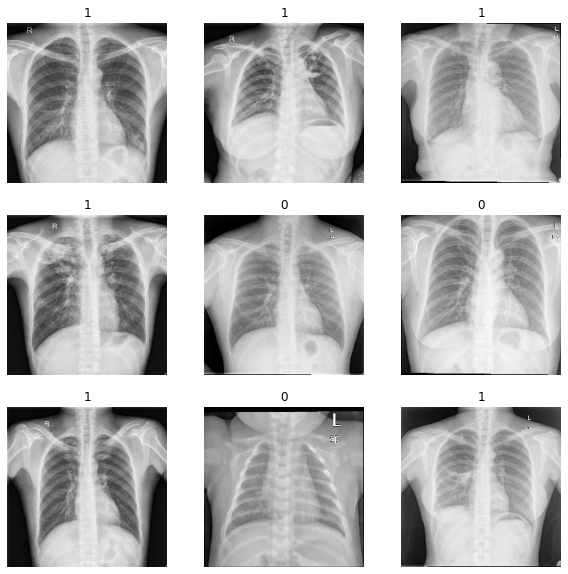

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dev_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(int(labels[i]))
        plt.axis("off")

In [17]:
!pip install livelossplot

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

monitor_val_acc = EarlyStopping(monitor = 'val_loss', 
                                patience = 5)

In [19]:
!pip install tf-nightly

In [20]:
# RegNet
from tensorflow.keras.applications.regnet import RegNetY040

from keras.models import Model
from keras.layers import Flatten, Dense

regnet = RegNetY040(include_top=False, input_shape=(224, 224, 3))

# breeze all VGG previous layers
for layer in regnet.layers:
	layer.trainable = False

flatten = Flatten()(regnet.layers[-1].output)
fc1 = Dense(128, activation='relu')(flatten)
out = Dense(1, activation='sigmoid')(fc1)

model = Model(inputs=regnet.inputs, outputs=out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 regnety040_prestem_rescaling (  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 Rescaling)                                                                                       
                                                                                                  
 regnety040_stem_conv (Conv2D)  (None, 112, 112, 32  864         ['regnety040_prestem_rescaling[0]
                                )                                [0]']                      

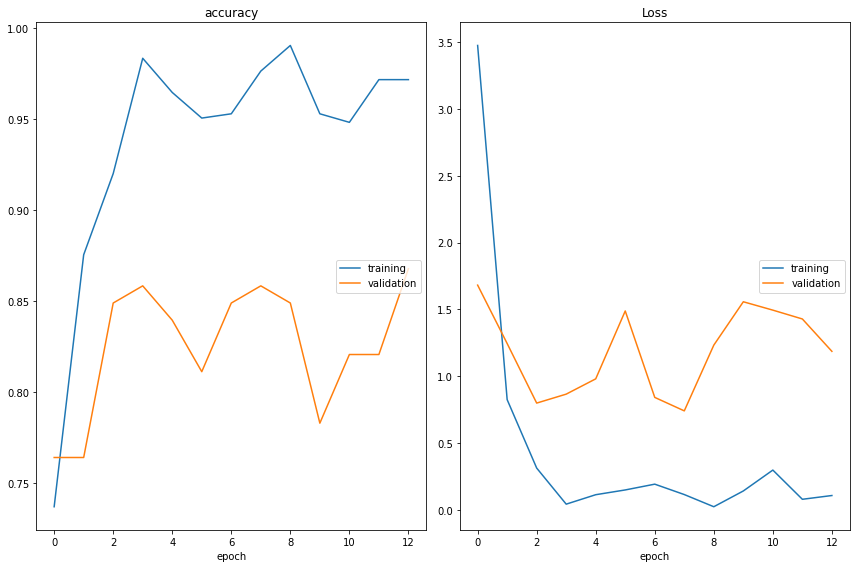

accuracy
	training         	 (min:    0.737, max:    0.991, cur:    0.972)
	validation       	 (min:    0.764, max:    0.868, cur:    0.868)
Loss
	training         	 (min:    0.023, max:    3.476, cur:    0.107)
	validation       	 (min:    0.740, max:    1.682, cur:    1.186)
14/14 [==============================] - 18s 693ms/step - loss: 0.1069 - accuracy: 0.9718 - val_loss: 1.1861 - val_accuracy: 0.8679


In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_set, 
           epochs = 200,
           batch_size=1024,
           callbacks=[PlotLossesKeras(), monitor_val_acc],
           validation_data = dev_set)

In [22]:
model.save('/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Models/Models for Shenzhen/model_regnet.h5')